In [1]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm
from sklearn import mixture
from tabulate import tabulate
np.random.seed(0)
print 'finished2'

finished2


In [2]:
feature_names = []
with open('C:\mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)

Loaded feature names: 126


In [3]:
X, Y = [], []
with open('C:\mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)
# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)
# Split into train and test data.
mini_train_data, mini_train_labels = X[:100], Y[:100]
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]
# Check that the shapes look right.
print train_data.shape, test_data.shape
print train_labels.shape, test_labels.shape

(7000L, 126L) (1124L, 126L)
(7000L,) (1124L,)


In [87]:
# P1) ***************
pca = PCA()
pca.fit(train_data)
print 'all variances should sum to 100% ==>', sum(pca.explained_variance_ratio_)
for i in range(0,50):    
    print 'explained variance of compenent #', i, 'is', pca.explained_variance_ratio_[i]

all variances should sum to 100% ==> 1.0
explained variance of compenent # 0 is 0.164043312793
explained variance of compenent # 1 is 0.133234788694
explained variance of compenent # 2 is 0.101734565221
explained variance of compenent # 3 is 0.0706335643499
explained variance of compenent # 4 is 0.038666463507
explained variance of compenent # 5 is 0.0368080430749
explained variance of compenent # 6 is 0.0312823910267
explained variance of compenent # 7 is 0.0273373735275
explained variance of compenent # 8 is 0.0261649046891
explained variance of compenent # 9 is 0.0223094256785
explained variance of compenent # 10 is 0.0204817295367
explained variance of compenent # 11 is 0.0186833065909
explained variance of compenent # 12 is 0.0173442203292
explained variance of compenent # 13 is 0.016843606457
explained variance of compenent # 14 is 0.0151881879472
explained variance of compenent # 15 is 0.0150861842811
explained variance of compenent # 16 is 0.0142913350365
explained variance of 

<type 'numpy.ndarray'>


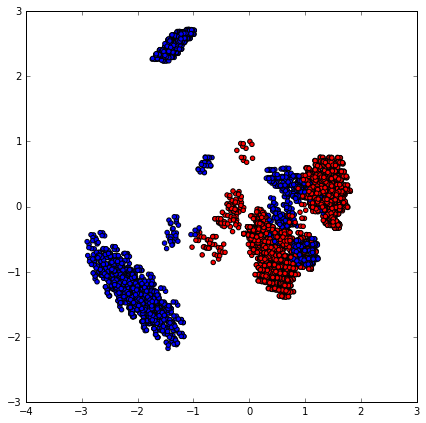

In [88]:
# P2)************************************
pca = PCA(n_components=2)
pca.fit(train_data)
pcatransformed = pca.fit_transform(train_data)
test_data_trans=pca.transform(test_data)
print type(pcatransformed)
plotcolors = ['r' if label == 0 else 'b' for label in train_labels]
fig = plt.figure(figsize=(7, 7))
plt.scatter(pcatransformed[:, 0], pcatransformed[:, 1], c=plotcolors)  

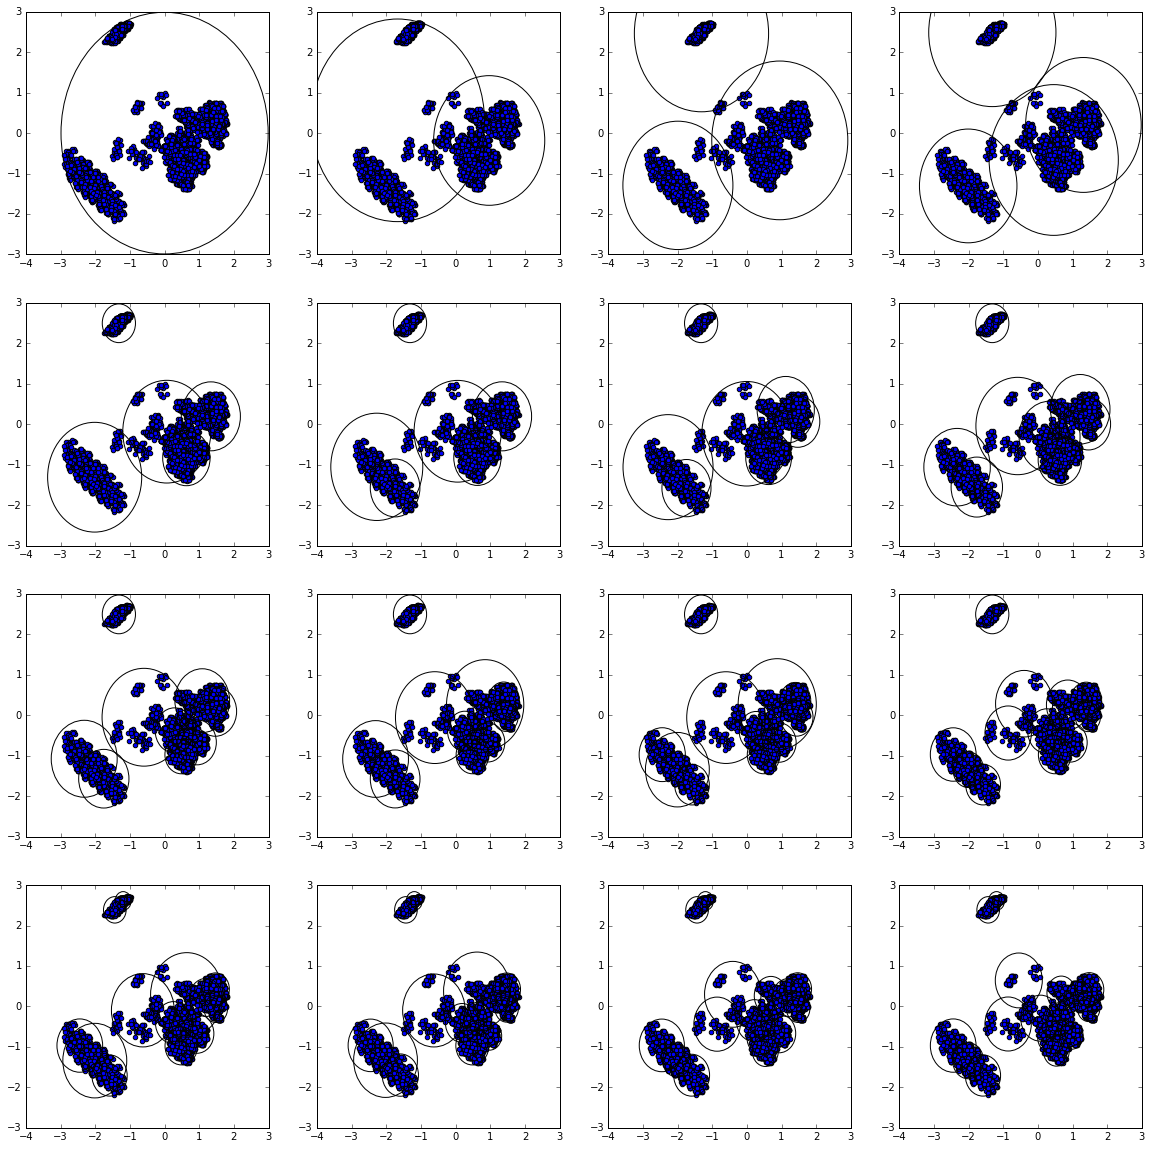

In [90]:
# P3)************************* this problem almost killed me
myfig = plt.figure(figsize=(16,16))
pca = PCA(n_components=2)
pcatransformed = pca.fit_transform(train_data)
plots,subplots = plt.subplots(4,4, figsize = (20,20))   
for i in range(0, 16):
    max_dists=[]
    kmeans = KMeans(n_clusters=i+1)
    preds = kmeans.fit_predict(pcatransformed)    
    centers = kmeans.cluster_centers_   
    distances = kmeans.transform(pcatransformed)  
    for j in range(0, i+1):
            max_dists.append(max(distances[preds==j][:,j])) 
    row = i/4
    col = i%4
    subplot = subplots[row, col]
    subplot.scatter(pcatransformed[:,0], pcatransformed[:, 1])
    for z in range(0, i+1):
        currCir = plt.Circle(centers[z], max_dists[z], fill=False)
        subplot.add_artist(currCir)
plt.show()

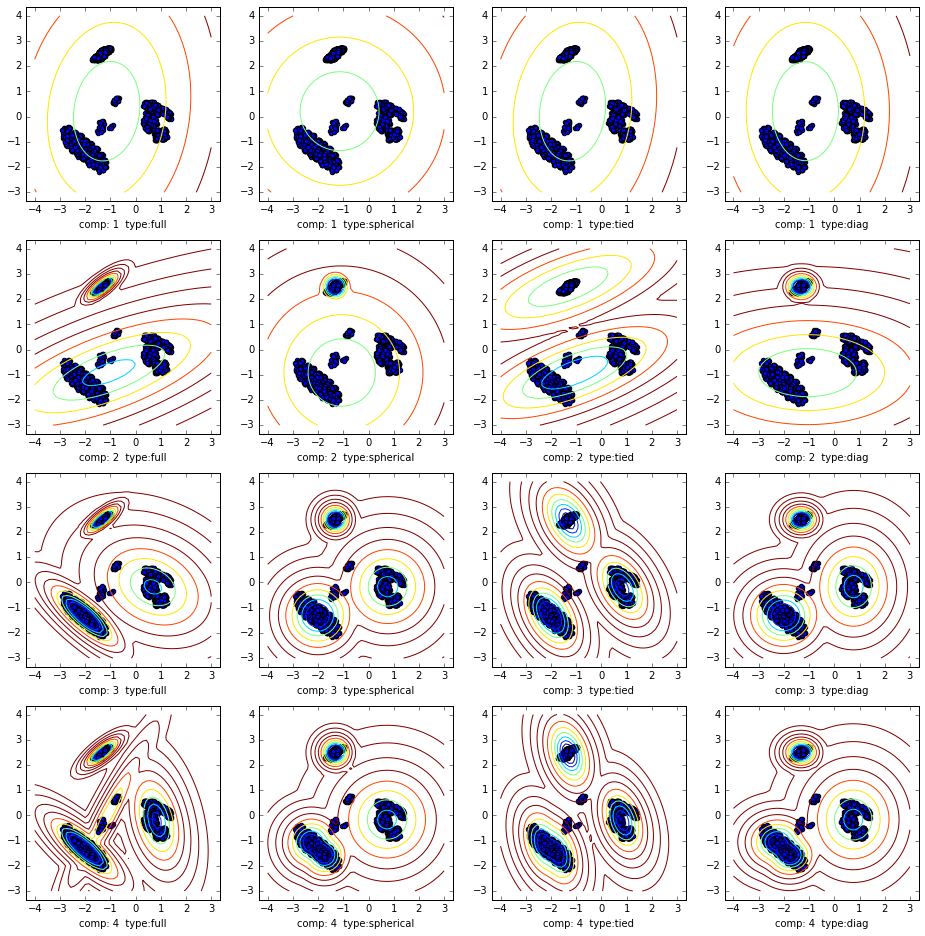

In [93]:
#P4) Update graph code with different permutations of component and covar type
pca = PCA(n_components=2)
pcatransformed = pca.fit_transform(train_data)
positive = pcatransformed[train_labels==1]        
types = ['full', 'spherical', 'tied', 'diag']
curr_plt = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
p=0
myfig = plt.figure(figsize=(16,16))
# set up all permutations for GMM compoentents and variance types
for i in range(1, 5):
    for j in range(0, 4):
        clf = GMM(n_components=i, covariance_type=types[j])
        clf.fit(positive)
        ## leave chart code unchanged
        x, y = np.linspace(-4.0, 3.0), np.linspace(-3.0, 4.0)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -clf.score_samples(XX)[0]
        Z = Z.reshape(X.shape)
        ## add subplots for multiple graphs
        side = myfig.add_subplot(4,4, curr_plt[p])
        ## adjust scale
        side.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=10.0), levels=np.logspace(0, 1.5, 10))
        ## add data
        side.scatter(positive[:, 0], positive[:, 1])
        # print label
        currtype = types[j]
        side.set_xlabel('comp: '+ str(i) +'  type:'+ currtype)
        p+=1

In [92]:
#P5)*******************************************
# Create 2 GMMs, one for positive, one for negative
# predict outcome == positive when posGMM score has greater probability than negative GMM score
pca = PCA(n_components=2)
pcatransformed = pca.fit_transform(train_data)
test_data_trans=pca.transform(test_data)    
positive = pcatransformed[train_labels==1]        
negative = pcatransformed[train_labels==0]        
posclf = GMM(n_components= 4, covariance_type='full')
negclf = GMM(n_components= 4, covariance_type='full')
posclf.fit(positive)
negclf.fit(negative)
posscores = posclf.score(test_data_trans)
negscores = negclf.score(test_data_trans)
accurate=0
preds = (posscores > negscores).astype(int)
for pred, label in zip(preds, test_labels):
    if (pred == label):
        accurate +=1
accuracy = float(accurate)/float(preds.shape[0])
print 'Accuracy when making prediction based on higher prob of pos/neg GMMs is: %.2f' %(accuracy)

Accuracy when making prediction based on higher prob of pos/neg GMMs is: 0.95


In [94]:
#P6) *********************************************************
# Return number of parameters based on 
#  https://github.com/scikit-learn/scikit-learn/blob/51a765a/sklearn/mixture/gmm.py#L619
def _n_parameters(self):
        mean_params = 0
        ndim = self.means_.shape[1]
        if self.covariance_type == 'full': cov_params = self.n_components * ndim * (ndim + 1) / 2.
        elif self.covariance_type == 'diag': cov_params = self.n_components * ndim
        elif self.covariance_type == 'tied': cov_params = ndim * (ndim + 1) / 2.
        elif self.covariance_type == 'spherical':
            cov_params = self.n_components
            mean_params = ndim * self.n_components
        return int(cov_params + mean_params + self.n_components - 1)    
results = []
types = ['full', 'spherical', 'tied', 'diag']
maxaccuracy = 0
maxresults = []

#Set up all combinations of PCA dimensions, GMM components, and GMM covariance type
for i in range(1, 10):
    for j in range(1, 10):
        for k in range(0, 4):
            pcadim = i
            gmmcomp = j
            numparams = 0
            pca = PCA(n_components=pcadim)        
            pcatransformed = pca.fit_transform(train_data)  
            #create positive GMM to test # of parameters
            positive = pcatransformed[train_labels==1]        
            pos_GMM = GMM(n_components= gmmcomp, covariance_type=types[k])
            pos_GMM.fit(positive)
            numparameters = _n_parameters(pos_GMM) 
            # see if # of parameters is greater than 50
            if (numparameters*2 < 50):               
                # proceed with testing and create negative GMM
                test_data_trans = pca.transform(test_data)
                negative = pcatransformed[train_labels==0]   
                neg_GMM = GMM(n_components= gmmcomp, covariance_type=types[k])
                neg_GMM.fit(negative)
                posscores = pos_GMM.score(test_data_trans)
                negscores = neg_GMM.score(test_data_trans)
                accurate=0
                preds = (posscores > negscores).astype(int)           
                for pred, label in zip(preds, test_labels):
                    if (pred == label):
                        accurate +=1
                accuracy = float(accurate)/float(preds.shape[0])
                onerow=[numparameters*2, i, j, types[k], accuracy]
                results.append(onerow)
results = sorted(results, key=lambda x: x[4], reverse=True) 
myheader = ['Num Params', 'PCA dimensions', 'GMM components', 'Covariance Matrix', 'Accuracy']
print tabulate(results, headers=myheader, tablefmt="simple", numalign='center', stralign='center')

 Num Params    PCA dimensions    GMM components    Covariance Matrix    Accuracy
------------  ----------------  ----------------  -------------------  ----------
     44              5                 8                 tied           0.991103
     46              5                 9                 tied           0.991103
     42              5                 7                 tied           0.983096
     46              6                 3                 tied           0.980427
     46              5                 4                 diag           0.976868
     34              5                 3                 tied           0.975979
     36              5                 4                 tied           0.975089
     38              5                 5                 tied           0.975089
     48              6                 4                 tied           0.97242
     46              7                 3                 diag           0.97242
     34              5       